# Data exploration

In [2]:
import csv
import h5py
import json

import cv2
import math
import numpy as np

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pylab
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.image as mpimg

import seaborn as sns; 
sns.set(color_codes=True)

matplotlib.pylab.rcParams['figure.figsize'] = (18, 12)
matplotlib.pylab.rcParams['agg.path.chunksize'] = 10000

In [28]:
# Load simulation data.
filename = './data/5/dataset.npz'
data = np.load(filename)
images = data['images']

# Pre-process images.
images = images.astype(np.float32) / 255.
images = 2. * images - 1.

angle = data['angle']

In [7]:
print(data.keys())

['angle_rsth1', 'angle_rsth8', 'angle_pre2', 'angle_pre6', 'angle_sth4', 'images', 'angle_rsth4', 'angle_pre3', 'speed', 'angle_rsth2', 'angle_pre4', 'angle_sth8', 'angle_sth1', 'angle_sth32', 'angle_rsth16', 'angle_sth16', 'angle_sth2', 'angle', 'angle_rsth32', 'throttle']


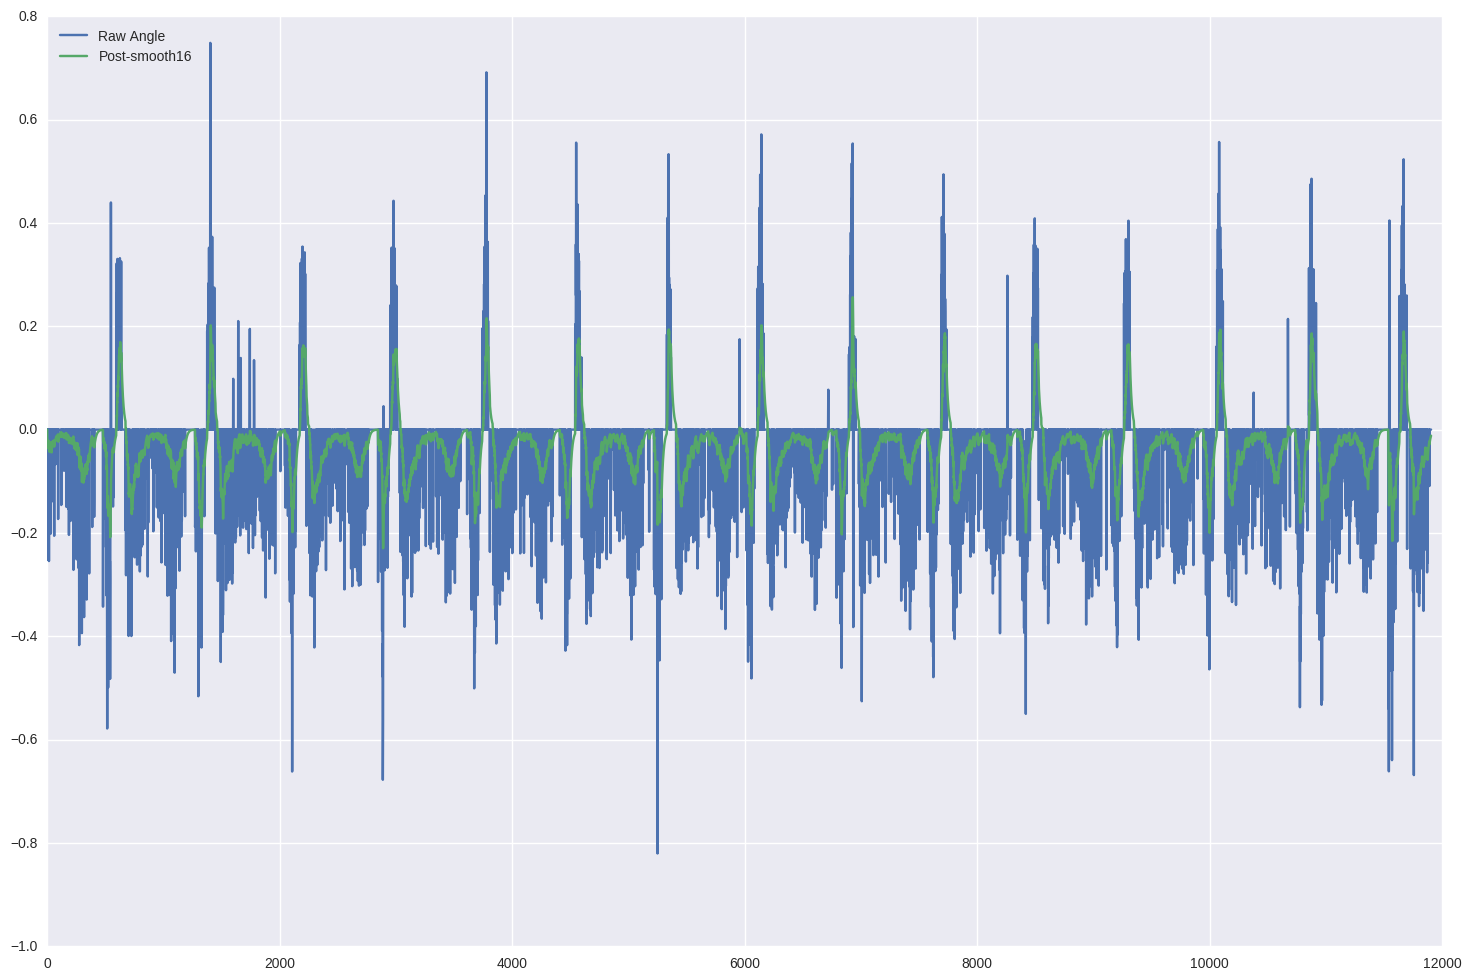

In [36]:
plt.plot(data['angle'], label='Raw Angle')
plt.plot(data['angle_sth16'], label='Post-smooth16')
# plt.plot(data['angle_rsth16'], label='Pre-smooth16')
# plt.plot(data['angle_pre6'], label='Pre-avg6')

plt.legend(loc='upper left')
plt.show()

In [42]:
def sinc(alpha):
    y = np.ones_like(alpha)
    mask = alpha != 0.0 
    y[mask] = np.sin(alpha[mask]) / alpha[mask]
    return y

def cosc(alpha):
    y = np.zeros_like(alpha)
    mask = alpha != 0.0 
    y[mask] = (1. - np.cos(alpha[mask])) / alpha[mask]
    return y


In [44]:
# Constant: frequency, speed and car length
dt = 0.1
speed = 48.28032 * 1000 / 3600
length = 5.

# Rotation radius
# radius = length / np.sin(angle)
alpha = speed * dt / length * np.sin(angle)

# dx displacement vectors
dx = np.zeros(shape=(len(angle), 2), dtype=np.float32)
dx[:, 0] = speed * dt * sinc(alpha)
dx[:, 1] = speed * dt * cosc(alpha)
